# AI Weather Forecasting - Dissertation

### Required prequistes such as importing modules and preparing dataset.

In [1]:
# Import required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import make_scorer

### References used for the code:

- https://blog.quantinsti.com/creating-heatmap-using-python-seaborn/
- Worksheet 1 - Week 13

### Importing, analysing and cleaning dataset

In [2]:
import pandas as pd
import numpy as np

# Reading the CSV File
data_weather = pd.read_csv('data_weather.csv')

In [3]:
# Converting the date column to datetime
data_weather['date'] = pd.to_datetime(data_weather['date'], format='%Y%m%d')

# Print out the first few rows of the data
print(data_weather.head())

# Show the summary of the dataframe
print(data_weather.info())

# Show descriptive statistics
print(data_weather.describe())

        date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0 1979-01-01          2.0       7.0              52.0       2.3       -4.1   
1 1979-01-02          6.0       1.7              27.0       1.6       -2.6   
2 1979-01-03          5.0       0.0              13.0       1.3       -2.8   
3 1979-01-04          8.0       0.0              13.0      -0.3       -2.6   
4 1979-01-05          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dat

In [75]:
print("")
print("Checking for na values:")
print(data_weather.isnull().sum())

data_weather = data_weather.dropna()

print("")
print("After removing na values:")
print(data_weather.isnull().sum())


Checking for na values:
date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

After removing na values:
date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64


In [76]:
data_weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


Heatmap of correlation in dataset using seaborn, strong correlated indicators are shown with values closer to 1.00 with mean_temp having a weak correlation with cloud cover, percipitation and pressure but a strong crrelation with sunshine and global_radiation.

<AxesSubplot:>

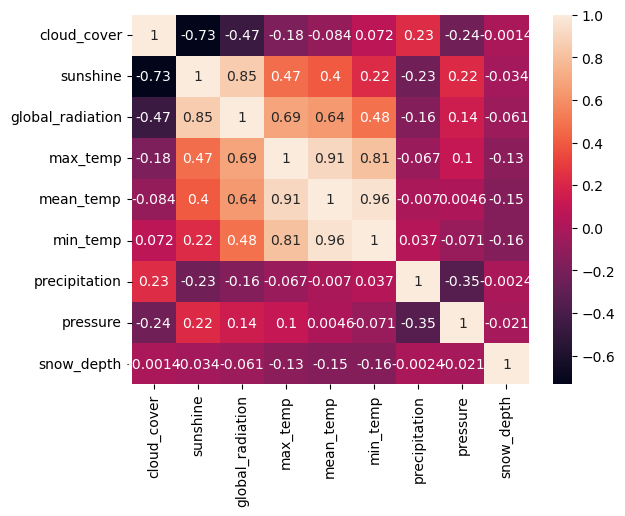

In [77]:
# Reference - https://blog.quantinsti.com/creating-heatmap-using-python-seaborn/
    
sns.heatmap(data_weather.corr(), annot = True)

In [78]:
correlation_matrix = data.corr()
print(correlation_matrix['mean_temp'])

cloud_cover        -0.110556
sunshine            0.396535
global_radiation    0.635432
max_temp            0.912200
mean_temp           1.000000
min_temp            0.955593
precipitation      -0.010462
pressure            0.004764
snow_depth         -0.154945
Name: mean_temp, dtype: float64


### Splitting up the data

                  cloud_cover  sunshine  global_radiation  max_temp  \
cloud_cover          1.000000 -0.816919         -0.471658 -0.246359   
sunshine            -0.816919  1.000000          0.762244  0.474140   
global_radiation    -0.471658  0.762244          1.000000  0.662993   
max_temp            -0.246359  0.474140          0.662993  1.000000   
mean_temp           -0.128014  0.380376          0.614236  0.906121   
min_temp             0.081722  0.161665          0.443508  0.795279   
precipitation        0.292931 -0.307808         -0.233249 -0.094399   
pressure            -0.349242  0.363892          0.271483  0.203273   
snow_depth           0.065444 -0.056683         -0.059666 -0.089485   

                  mean_temp  min_temp  precipitation  pressure  snow_depth  
cloud_cover       -0.128014  0.081722       0.292931 -0.349242    0.065444  
sunshine           0.380376  0.161665      -0.307808  0.363892   -0.056683  
global_radiation   0.614236  0.443508      -0.233249  0.27

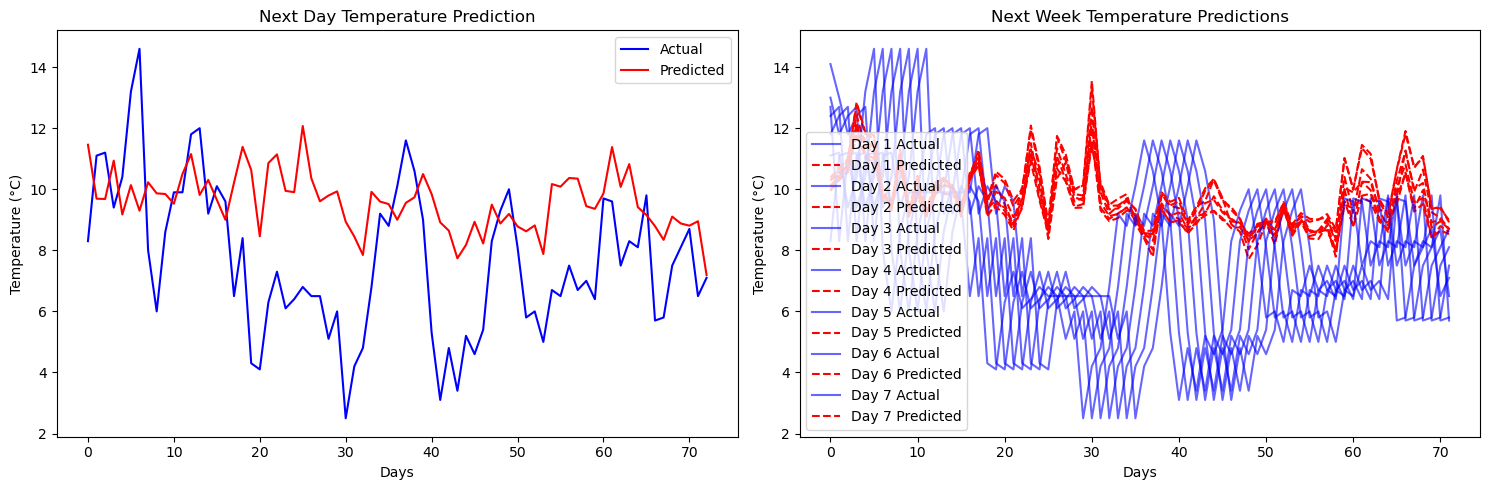

In [80]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data_weather.csv')
data = data.dropna()

# Segment the last year of data for testing
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
last_year = data['date'].max().year
data_last_year = data[data['date'].dt.year == last_year]

# Check correlation between predictors
correlation_matrix = data_last_year.drop(columns=['date']).corr()
print(correlation_matrix)

# Prepare data for short-term prediction
X = data_last_year.drop(columns=['date', 'max_temp', 'mean_temp', 'min_temp'])
y_short = data_last_year['mean_temp'].shift(-1)  # next day
X_short, y_short = X[:-1], y_short[:-1]

# Prepare data for multi-step prediction (next week)
y_multi = [data_last_year['mean_temp'].shift(-i) for i in range(1, 8)]
y_multi = pd.concat(y_multi, axis=1).dropna()
X_multi = X.iloc[:len(y_multi)]

# Splitting data (using 80% for training and 20% for testing as an example)
X_train_short, X_test_short, y_train_short, y_test_short = train_test_split(X_short, y_short, test_size=0.2, shuffle=False)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, shuffle=False)

# Short term prediction
model_short = LinearRegression().fit(X_train_short, y_train_short)
y_pred_short = model_short.predict(X_test_short)

# Multi-step prediction
model_multi = LinearRegression().fit(X_train_multi, y_train_multi)
y_pred_multi = model_multi.predict(X_test_multi)

# Visualization
plt.figure(figsize=(15, 5))

# Short term
plt.subplot(1, 2, 1)
plt.plot(y_test_short.values, label="Actual", color='blue')
plt.plot(y_pred_short, label="Predicted", color='red')
plt.xlabel("Days")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.title("Next Day Temperature Prediction")

# Multi-step
plt.subplot(1, 2, 2)
for i in range(7):
    plt.plot(y_test_multi.iloc[:, i].values, label=f"Day {i+1} Actual", color='blue', alpha=0.6)
    plt.plot(y_pred_multi[:, i], label=f"Day {i+1} Predicted", color='red', linestyle='dashed')
plt.xlabel("Days")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.title("Next Week Temperature Predictions")

plt.tight_layout()
plt.show()

In [94]:
from sklearn.metrics import mean_squared_error, r2_score

# Short term prediction evaluation
mse_short = mean_squared_error(y_test_short, y_pred_short)
print(f'Short Term Prediction: MSE = {mse_short:.2f}, RMSE = {rmse_short:.2f}, R^2 = {r2_short:.2f}')

# Multi-step prediction evaluation
mse_multi = [mean_squared_error(y_test_multi.iloc[:, i], y_pred_multi[:, i]) for i in range(7)]
print("")
print("Long term prediction:")
for i in range(7):
    print(f'Day {i+1} Prediction: MSE = {mse_multi[i]:.2f}, RMSE = {rmse_multi[i]:.2f}, R^2 = {r2_multi[i]:.2f}')



Short Term Prediction: MSE = 9.06, RMSE = 3.01, R^2 = -0.55

Long term prediction:
Day 1 Prediction: MSE = 8.96, RMSE = 2.99, R^2 = -0.18
Day 2 Prediction: MSE = 8.99, RMSE = 3.00, R^2 = -0.26
Day 3 Prediction: MSE = 8.56, RMSE = 2.93, R^2 = -0.27
Day 4 Prediction: MSE = 8.92, RMSE = 2.99, R^2 = -0.36
Day 5 Prediction: MSE = 9.74, RMSE = 3.12, R^2 = -0.56
Day 6 Prediction: MSE = 12.65, RMSE = 3.56, R^2 = -1.13
Day 7 Prediction: MSE = 12.30, RMSE = 3.51, R^2 = -1.07


In [21]:
# Set the split date to one year before the maximum date
split_date = data_weather['date'].max() - pd.DateOffset(years=1)

# Split the data into train and test sets
train = data_weather[data_weather['date'] < split_date]
test = data_weather[data_weather['date'] >= split_date]

# Separate features and target variable for the training set
X_train = train.drop(['date', 'mean_temp'], axis=1)
y_train = train['mean_temp']

# Separate features and target variable for the test set
X_test = test.drop(['date', 'mean_temp'], axis=1)
y_test = test['mean_temp']

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13477, 8)
(366, 8)
(13477,)
(366,)


### Setting the linear regressor model for the baseline

In [43]:
# Reference - Worksheet 1 // Week 13

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize a linear regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)

# Calculate the mean squared error of the predictions
lr_mse = mean_squared_error(y_test, lr_predictions)

# Calculate the root mean squared error
lr_rmse = np.sqrt(lr_mse)

# Calculate R-squared (R2)
lr_r2 = r2_score(y_test, lr_predictions)

print('Baseline MSE:', lr_mse)
print('Baseline RMSE:', lr_rmse)

# Only for linear regression
print('R-squared (R2):', round(lr_r2, 7) * 100, '%')

Baseline MSE: 0.9892234924214696
Baseline RMSE: 0.9945971508211099
R-squared (R2): 96.814 %


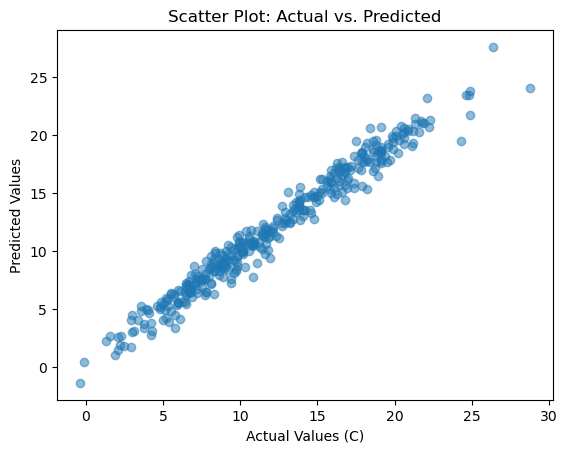

In [46]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(y_test, lr_predictions, alpha=0.5)
plt.xlabel('Actual Values (C)')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Actual vs. Predicted')
plt.show()

In [9]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initialize models
rf_model = RandomForestRegressor(n_estimators=100)
xgb_model = XGBRegressor(n_estimators=100)

# Train models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# Calculate the mean squared error of the predictions
rf_mse = mean_squared_error(y_test, rf_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)

print('Random Forest MSE:', rf_mse)
print('XGBoost MSE:', xgb_mse)


Random Forest MSE: 0.9318842459016393
XGBoost MSE: 0.9321841537412546


mean_temp           1.000000
min_temp            0.955826
lag_1               0.940336
max_temp            0.907117
lag_2               0.884690
lag_3               0.848639
lag_4               0.824889
lag_5               0.807639
lag_6               0.795706
lag_7               0.784480
global_radiation    0.635663
sunshine            0.397690
pressure            0.004620
precipitation      -0.008163
cloud_cover        -0.084598
snow_depth         -0.150092
Name: mean_temp, dtype: float64


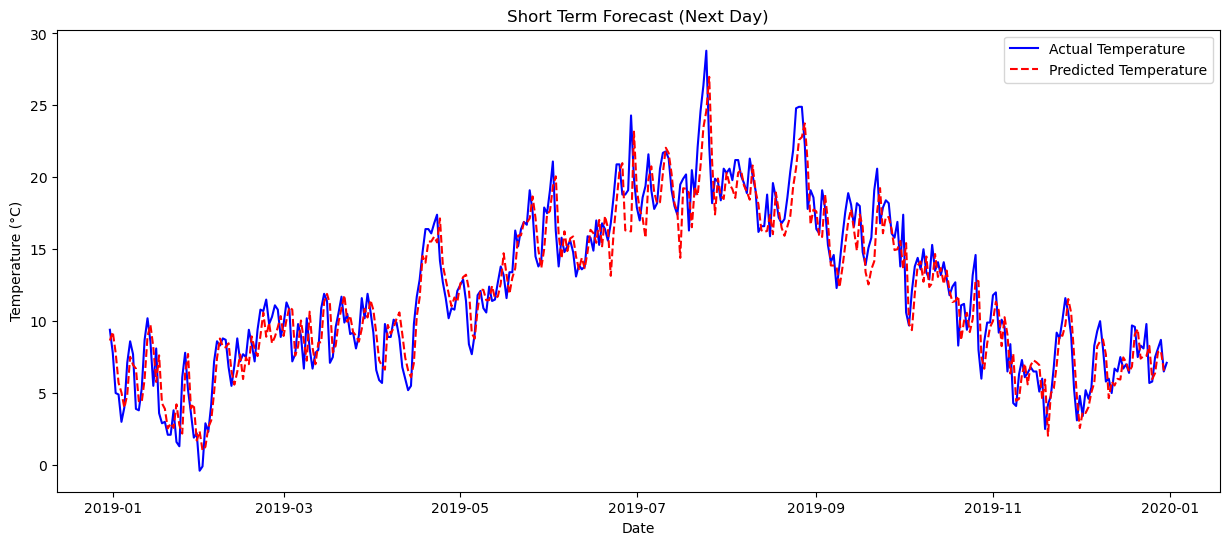

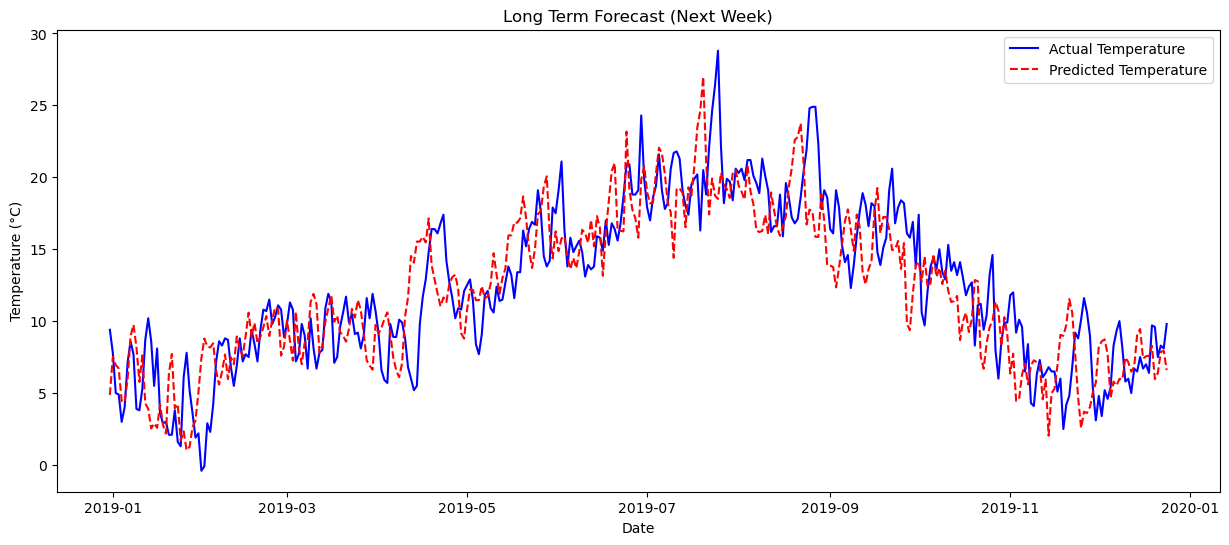

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data_weather.csv')
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

# Create lag features for temperature
for i in range(1, 8):
    data[f"lag_{i}"] = data["mean_temp"].shift(i)

data.dropna(inplace=True)

# Correlation check
correlation_matrix = data.corr()
print(correlation_matrix["mean_temp"].sort_values(ascending=False))

# Split the data
train_data = data[data['date'] < data['date'].max() - pd.DateOffset(years=1)]
test_data = data[data['date'] >= data['date'].max() - pd.DateOffset(years=1)]

features = ['cloud_cover', 'sunshine', 'global_radiation', 'lag_1', 'precipitation', 'pressure']
X_train = train_data[features]
y_train = train_data['mean_temp']
X_test = test_data[features]
y_test = test_data['mean_temp']

# Short term prediction (next day)
model = LinearRegression()
model.fit(X_train, y_train)
predictions_next_day = model.predict(X_test)

# Visualization for next day
plt.figure(figsize=(15, 6))
plt.plot(test_data['date'], y_test, label="Actual Temperature", color="blue")
plt.plot(test_data['date'], predictions_next_day, label="Predicted Temperature", color="red", linestyle="--")
plt.legend()
plt.title("Short Term Forecast (Next Day)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()

# Long term prediction (next week)
# You can adapt the lag features for this. For simplicity, we are using the same features.
predictions_next_week = []
for i in range(len(X_test) - 7):
    features_week = X_test.iloc[i:i+7]
    predictions_week = model.predict(features_week)
    predictions_next_week.append(predictions_week[-1])

# Visualization for next week
plt.figure(figsize=(15, 6))
plt.plot(test_data['date'].iloc[:-7], y_test.iloc[:-7], label="Actual Temperature", color="blue")
plt.plot(test_data['date'].iloc[:-7], predictions_next_week, label="Predicted Temperature", color="red", linestyle="--")
plt.legend()
plt.title("Long Term Forecast (Next Week)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()
